In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def show(img, cmap=False):
    if cmap==False:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])

def auto_gamma_correction(image):
    mean = np.mean(image)
    gamma = np.log(0.5) / np.log(mean / 255)
    corrected_image = np.power(image / 255.0, gamma) * 255
    return np.clip(corrected_image, 0, 255).astype(np.uint8)

In [3]:
roi_image = cv2.imread('ROI.png', cv2.IMREAD_GRAYSCALE)
roi_image2 = cv2.imread('ROI.png')

In [4]:
#step 1: auto gamma correction
agc_image = auto_gamma_correction(roi_image)

In [5]:
#step 2: CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
clahe_image = clahe.apply(agc_image)
clahe_image = clahe_image / 255

In [6]:
#step 3: gaussian blur
gaussian_filtered = cv2.GaussianBlur(clahe_image, (0, 0), 4)
gaussian_filtered = gaussian_filtered.astype(np.float32)
gaussian_filtered = gaussian_filtered * 255

In [7]:
#step 4: laplacian filter
laplacian_filtered = cv2.Laplacian(gaussian_filtered, cv2.CV_32F)
laplacian_filtered = np.maximum(laplacian_filtered, 0)
laplacian_filtered / 255

array([[0.00063931, 0.00064515, 0.00066115, ..., 0.00084647, 0.00085018,
        0.0008509 ],
       [0.00062711, 0.00063252, 0.00064784, ..., 0.0008205 , 0.00082511,
        0.00082655],
       [0.00059345, 0.00059797, 0.00061047, ..., 0.00074535, 0.00075295,
        0.00075474],
       ...,
       [0.00078915, 0.00078933, 0.00078921, ..., 0.00031876, 0.00038793,
        0.00041306],
       [0.00087394, 0.00087304, 0.00086849, ..., 0.00035206, 0.00042578,
        0.00045298],
       [0.00090326, 0.00090188, 0.00089602, ..., 0.00036427, 0.00043987,
        0.00046749]], dtype=float32)

In [8]:
#result
final_image = cv2.normalize(laplacian_filtered, None, 0, 255, cv2.NORM_MINMAX)
final_image_8bit = final_image.astype(np.uint8) 

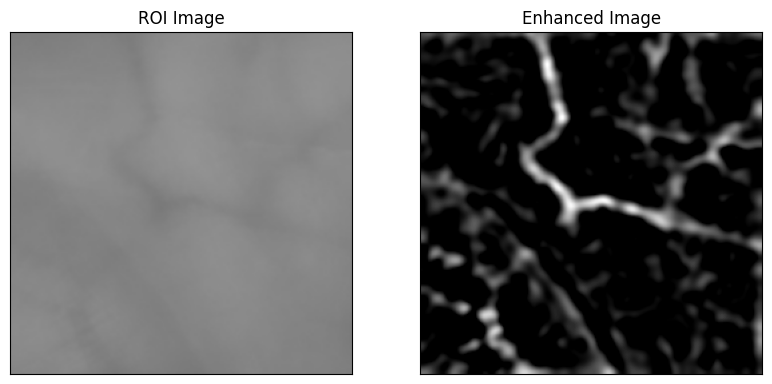

In [9]:
cv2.imwrite('enhanced_image.png', final_image_8bit)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.title("ROI Image")
show(roi_image2)

plt.subplot(132)
plt.title("Enhanced Image")
show(final_image_8bit, cmap=True)